In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('new.csv',delimiter=";",decimal=",")

In [3]:
df.head(10)

,Date of sale,net purchase per day,gross sale per day,tax of sale per day,"margin per day,,,"
0,24.12.2017,1334.95,1903.82,284.07,284.0
1,27.12.2017,2154.04,2953.43,420.77,378.0
2,28.12.2017,2120.66,2914.02,397.22,396.0
3,29.12.2017,2280.09,3152.23,409.60,462.0
4,30.12.2017,3463.87,4823.36,629.44,730.0
5,31.12.2017,1761.74,2561.25,404.21,395.0
6,01.01.2018,1217.90,1770.28,284.98,267.0
7,02.01.2018,1994.54,2758.13,349.96,413.0
8,03.01.2018,2161.07,2972.24,371.92,439.0
9,04.01.2018,1990.31,2705.36,346.30,368.0


In [4]:
#cleaning up the data
df=df.rename(columns={"margin per day,,,": "margin per day"})

In [5]:
df.shape

(362, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of sale          361 non-null    object 
 1   net purchase per day  362 non-null    float64
 2   gross sale per day    362 non-null    float64
 3   tax of sale per day   362 non-null    float64
 4   margin per day        362 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
net purchase per day,362.0,17313.490221,284436.424165,396.81,2056.9025,2335.280,2674.1175,5414124.75
gross sale per day,362.0,6735.683536,63882.441739,584.31,2895.8475,3320.945,3837.9750,1218719.16
tax of sale per day,362.0,3803.943674,64134.974770,83.55,369.6375,419.440,488.5275,1220682.59
margin per day,362.0,1587.700166,19155.923835,-155.00,480.0000,585.500,706.5000,365027.00


In [8]:
df.isnull().sum()

Date of sale            1
net purchase per day    0
gross sale per day      0
tax of sale per day     0
margin per day          0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Date of sale            0
net purchase per day    0
gross sale per day      0
tax of sale per day     0
margin per day          0
dtype: int64

In [11]:
df["Date of sale"] = pd.DatetimeIndex(df["Date of sale"])
df

,Date of sale,net purchase per day,gross sale per day,tax of sale per day,margin per day
0,2017-12-24,1334.95,1903.82,284.07,284.0
1,2017-12-27,2154.04,2953.43,420.77,378.0
2,2017-12-28,2120.66,2914.02,397.22,396.0
3,2017-12-29,2280.09,3152.23,409.60,462.0
4,2017-12-30,3463.87,4823.36,629.44,730.0
...,...,...,...,...,...
356,2018-12-20,2635.35,3770.30,446.82,688.0
357,2018-12-21,2757.31,3961.29,473.52,730.0
358,2018-12-22,4416.64,6426.81,734.23,1275.0
359,2018-12-23,2136.16,3134.60,415.48,582.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 360
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of sale          361 non-null    datetime64[ns]
 1   net purchase per day  361 non-null    float64       
 2   gross sale per day    361 non-null    float64       
 3   tax of sale per day   361 non-null    float64       
 4   margin per day        361 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 16.9 KB


In [13]:
df=df.sort_values(by="Date of sale").reset_index(drop=True) 

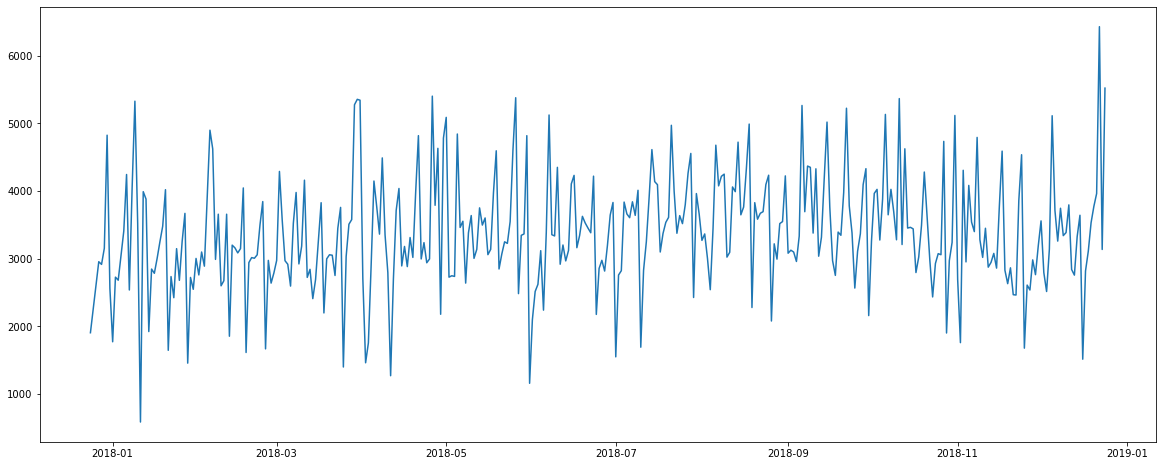

In [14]:
plt.figure(figsize=(20,8))
plt.plot(df["Date of sale"],df["gross sale per day"])

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
m=seasonal_decompose(df["gross sale per day"],freq=60)
trend=m.trend
seasonal=m.seasonal
residual=m.resid

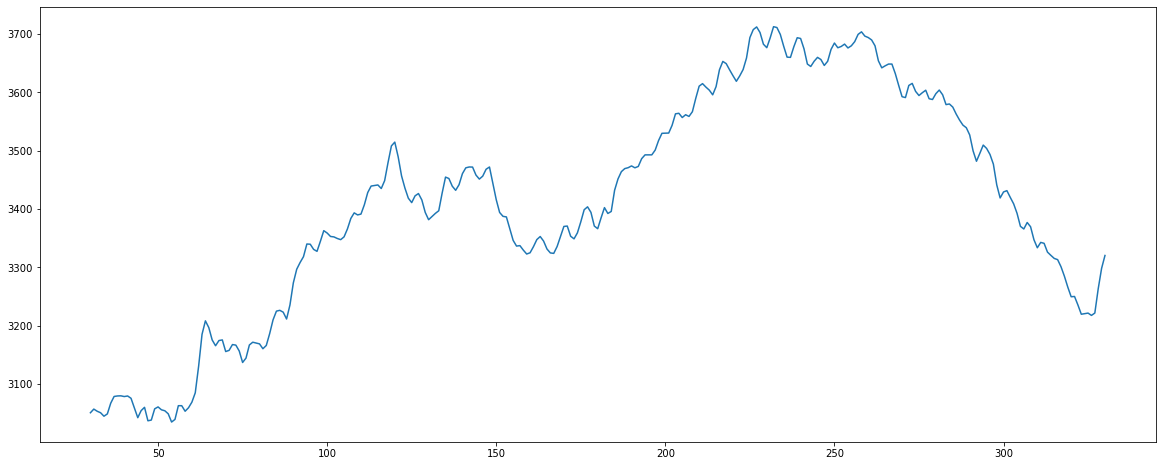

In [16]:
plt.figure(figsize=(20,8))
plt.plot(trend,label="trend")

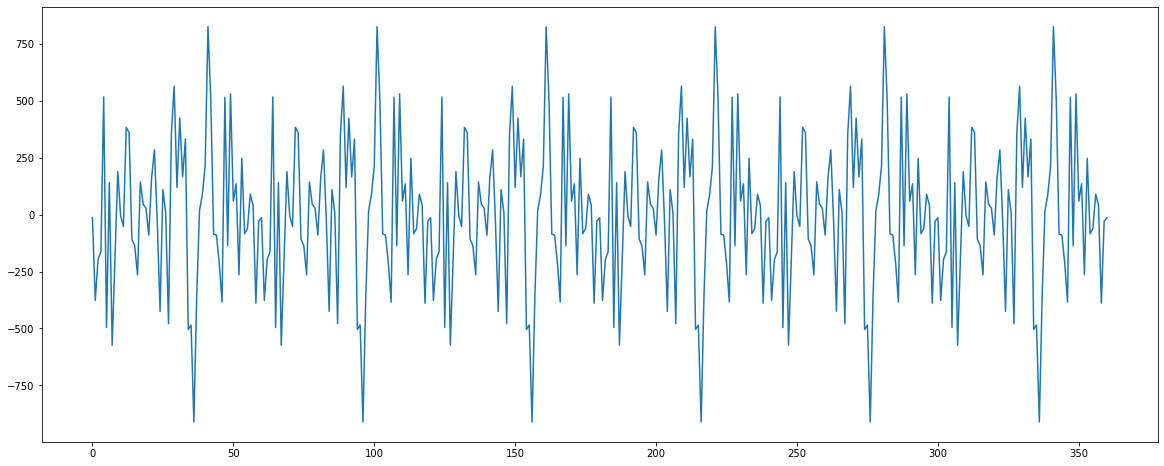

In [17]:
plt.figure(figsize=(20,8))
plt.plot(seasonal,label="seasonal")

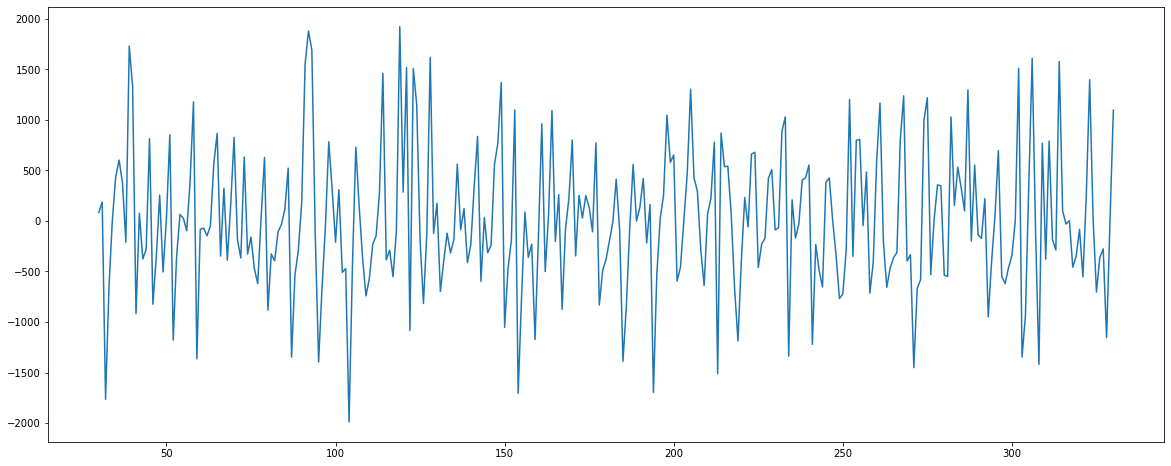

In [18]:
plt.figure(figsize=(20,8))
plt.plot(residual,label="residual")

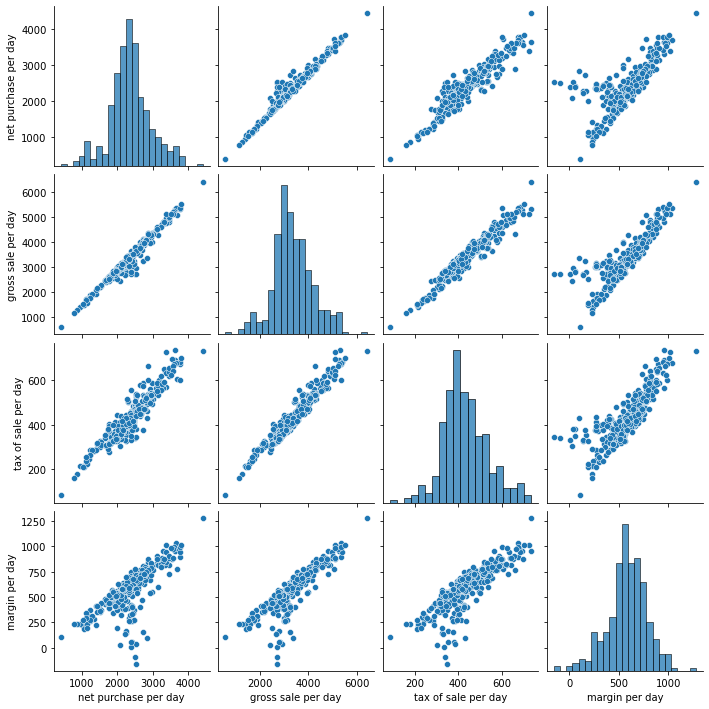

In [19]:
sns.pairplot(df)

<AxesSubplot:>

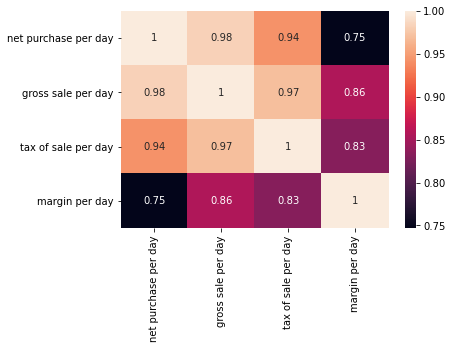

In [20]:
sns.heatmap(df.corr(),annot=True) #every column is positively correlated with each other as there are no negative values

In [21]:
#Augmented DickeyFuller Test
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df['gross sale per day'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

0                        -4.422628
1                         0.000271
2                         8.000000
3                       352.000000
Critical Value (1%)      -3.449065
Critical Value (5%)      -2.869786
Critical Value (10%)     -2.571163
dtype: float64


In [22]:
#here we are finding the p,d,q values for sarimax model
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df["gross sale per day"], start_p=0, start_q=0,
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6075.009, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5940.851, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6029.314, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5910.289, Time=1.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.78 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5971.910, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5881.428, Time=1.97 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5920.122, Time=0.80 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.01 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=4.29 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=3

In [23]:
#here we are passing these parameters 
from statsmodels.tsa.statespace.sarimax import SARIMAX
l=SARIMAX(df["gross sale per day"], order=(2,1,0), seasonal_order=(2,1,0,12))
a=l.fit()

In [24]:
#we are keeping the fitted values in one column
df["dixa"]=a.fittedvalues

No handles with labels found to put in legend.


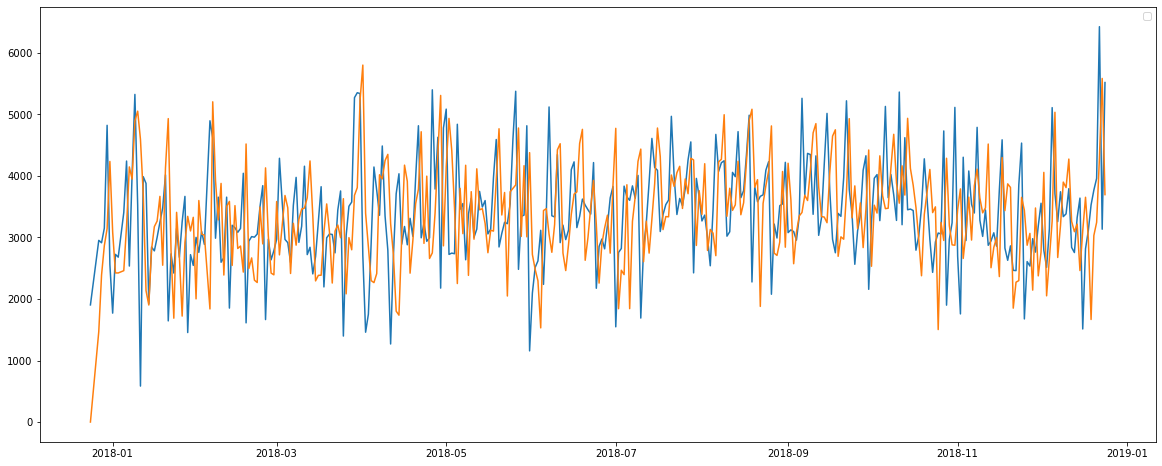

In [25]:
#plotting the graph of predicted and original
plt.figure(figsize=(20,8))
plt.plot(df["Date of sale"],df["gross sale per day"])
plt.plot(df["Date of sale"],df["dixa"])
plt.legend()

In [33]:
#forecasting for the next 30 days
f=a.predict(start=len(df),end=len(df)+30)

In [34]:
#these are the forecasted records
f

361    4906.737396
362    4331.828016
363    4726.935107
364    4108.670714
365    5549.924272
366    5533.019662
367    4516.526385
368    5059.061499
369    4985.115401
370    5984.404064
371    4922.789415
372    5579.699850
373    5476.578892
374    5192.493368
375    5326.236346
376    4673.686323
377    6257.398392
378    5852.316015
379    5481.848152
380    5910.154663
381    5802.978685
382    6925.504418
383    5683.186713
384    6314.254670
385    6059.156337
386    5983.807405
387    6262.607493
388    5103.662513
389    6544.845070
390    6505.363503
391    6210.597961
Name: predicted_mean, dtype: float64

In [35]:
#adding the forecasted to the original dataset
df["gross sale per day"].append(f)

0      1903.820000
1      2953.430000
2      2914.020000
3      3152.230000
4      4823.360000
          ...     
387    6262.607493
388    5103.662513
389    6544.845070
390    6505.363503
391    6210.597961
Length: 392, dtype: float64

No handles with labels found to put in legend.


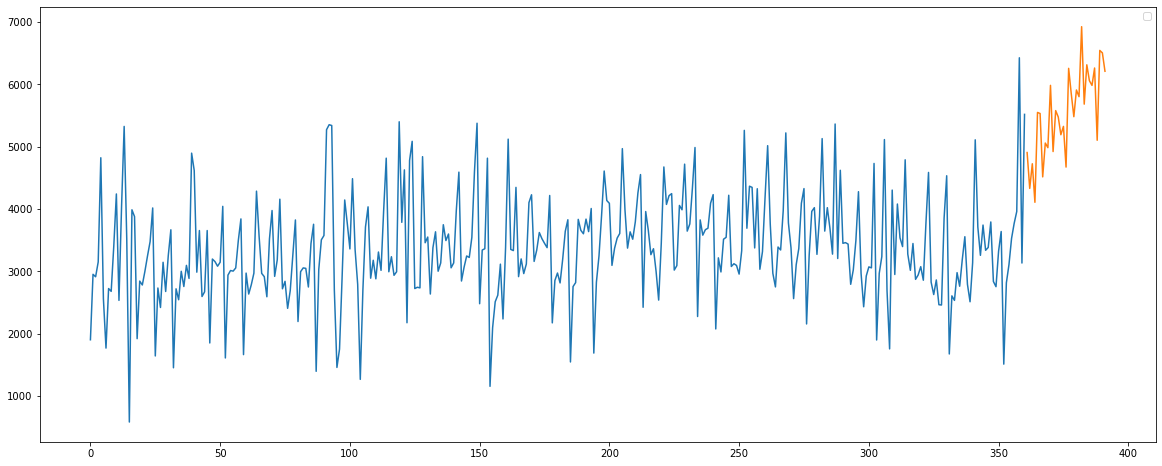

In [36]:
#and then plotting the graph
plt.figure(figsize=(20,8))
plt.plot(df["gross sale per day"])
plt.plot(f)
plt.legend()